In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk

In [2]:
dataset = pd.read_csv('marine_life_dataset.csv')
dataset.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,Herbivore,25.334903,0.306537
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,Carnivore,21.734394,0.421331
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,Carnivore,25.429249,0.713816
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,Carnivore,27.366580,0.343183
4,Western Reef,Fish,61,Endemic,Schooling,Deep,Herbivore,23.642494,0.349990


In [3]:
dataset.describe()

,Population,Water Temperature (°C),Nutrient Levels
count,1000.000000,1000.000000,1000.000000
mean,49.809000,24.980282,0.507339
std,28.396529,2.905684,0.227108
min,1.000000,20.017426,0.100145
25%,26.000000,22.482619,0.313938
50%,50.000000,24.785344,0.505267
75%,74.000000,27.505758,0.708002
max,99.000000,29.992590,0.899894


In [4]:
dataset.Species.value_counts()

Species
Jellyfish    277
Crab         249
Fish         239
Coral        235
Name: count, dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Region                  1000 non-null   object 
 1   Species                 1000 non-null   object 
 2   Population              1000 non-null   int64  
 3   Species Category        1000 non-null   object 
 4   Behavior                1000 non-null   object 
 5   Habitat Preference      1000 non-null   object 
 6   Trophic Level           1000 non-null   object 
 7   Water Temperature (°C)  1000 non-null   float64
 8   Nutrient Levels         1000 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


a) What is the distribution of species diversity and abundance across different regions of
the Coral Reef of Atlantis?
b) Are there any observable patterns or clusters in the dataset that distinguish between
endemic and invasive species?
c) How do environmental factors like water temperature and nutrient levels vary across
different regions of the reef?


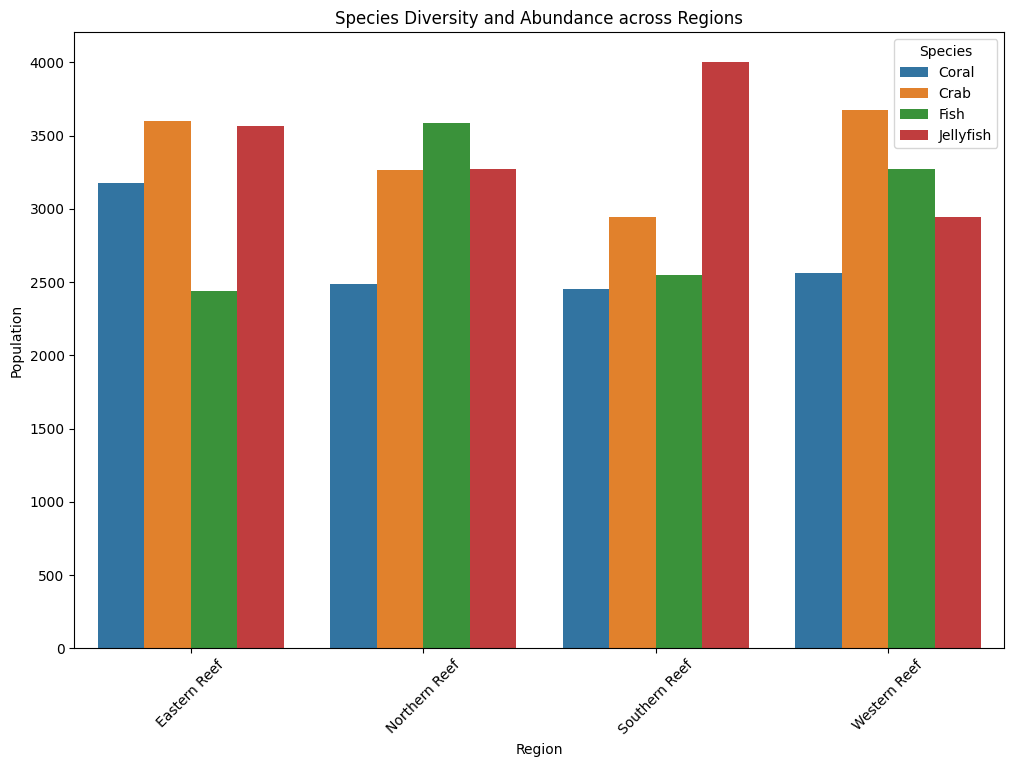

In [6]:
# a) What is the distribution of species diversity and abundance across different regions of the Coral Reef of Atlantis?
# b) Are there any observable patterns or clusters in the dataset that distinguish between endemic and invasive species?
# c) How do environmental factors like water temperature and nutrient levels vary across different regions of the reef?

# a) What is the distribution of species diversity and abundance across different regions of the Coral Reef of Atlantis?

# a plot of "Species" in each "Region" histograms (each region has its own histogram of the "Species" field)

# sns.set(style="whitegrid")
# sns.set_palette("husl")
# sns.countplot(x='Region', data=dataset, hue='Species')
# plt.show()

# Group the data by Region and Species, and sum up the Population
species_distribution = dataset.groupby(['Region', 'Species'])['Population'].sum().reset_index()

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Population', hue='Species', data=species_distribution)
plt.title('Species Diversity and Abundance across Regions')
plt.xlabel('Region')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.legend(title='Species')
plt.show()

# Species diversity







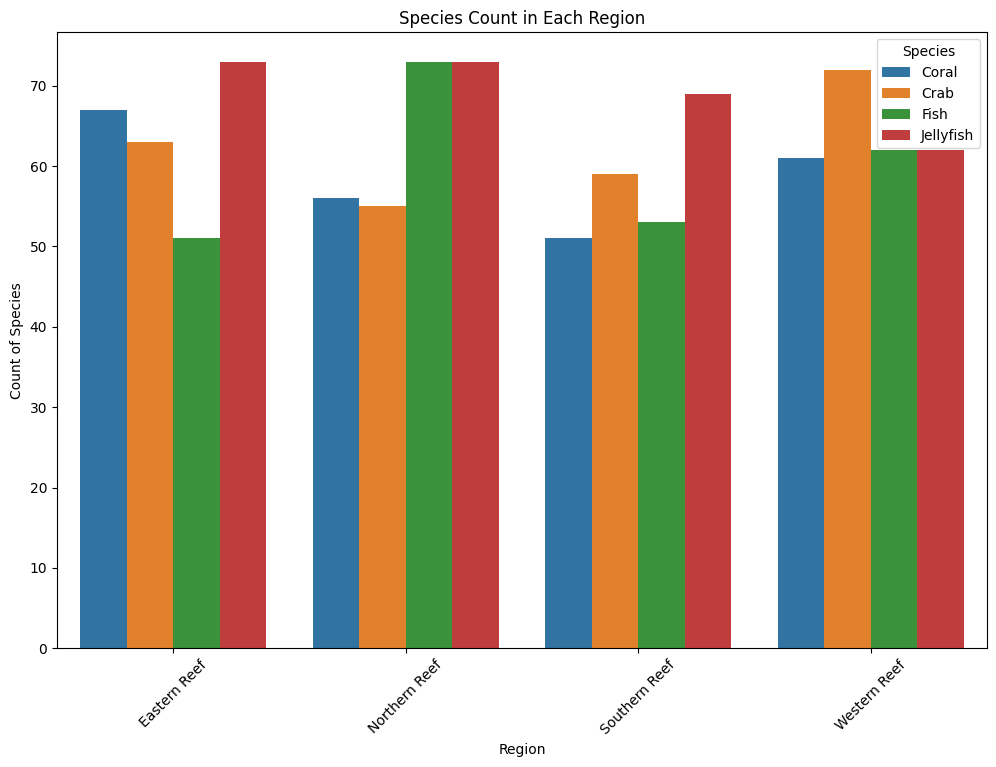

In [7]:

# Group the data by Region and Species, and count the occurrences
species_count = dataset.groupby(['Region', 'Species']).size().reset_index(name='Counts')

# Plotting the data using seaborn for ease of use with the 'hue' parameter for species differentiation
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Counts', hue='Species', data=species_count)
plt.title('Species Count in Each Region')
plt.xlabel('Region')
plt.ylabel('Count of Species')
plt.xticks(rotation=45)
plt.legend(title='Species')
plt.show()

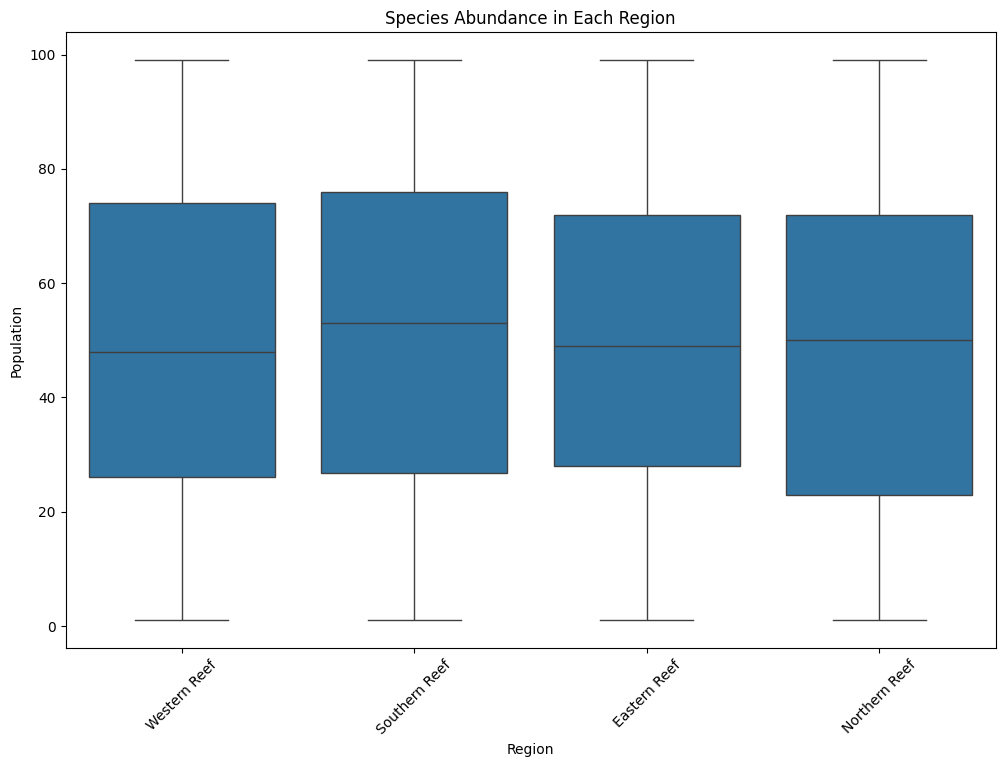

In [8]:
#boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Population', data=dataset)
plt.title('Species Abundance in Each Region')
plt.xlabel('Region')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()


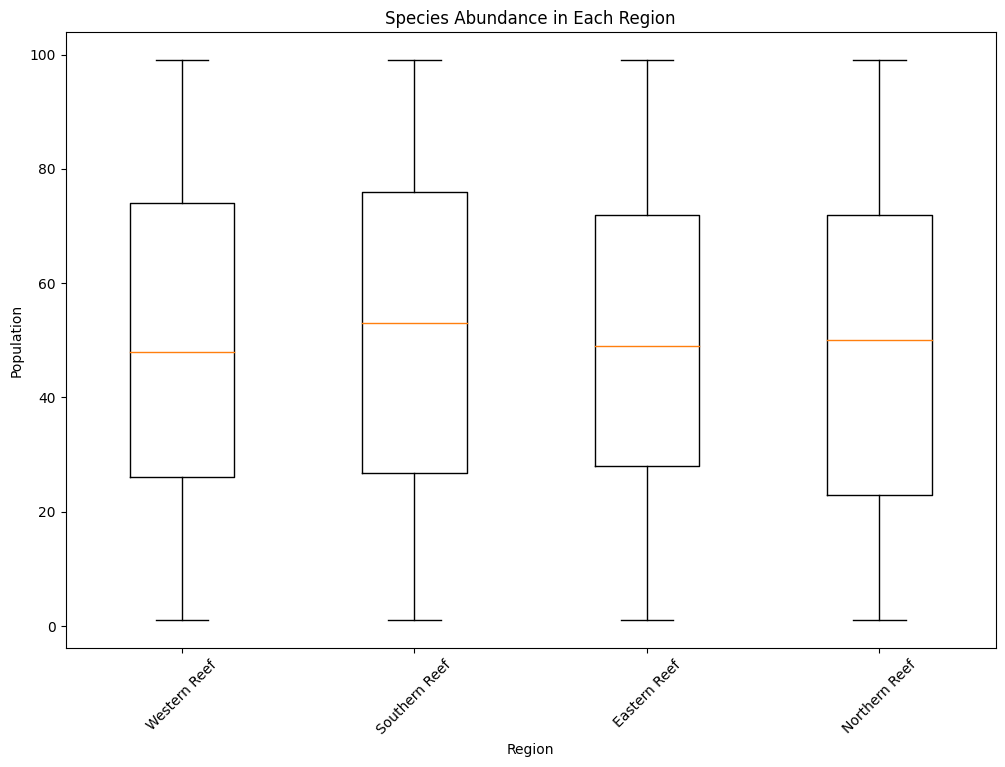

In [9]:
regions = dataset['Region'].unique()  # Get unique regions
data_to_plot = [dataset[dataset['Region'] == region]['Population'] for region in regions]

# Create a figure and an axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Create the boxplot
# 'positions' can be used to adjust where each box is plotted on the x-axis
ax.boxplot(data_to_plot, labels=regions)

# Customizing the plot
ax.set_title('Species Abundance in Each Region')
ax.set_xlabel('Region')
ax.set_ylabel('Population')
ax.set_xticklabels(regions, rotation=45)  # Rotate the region labels for better readability

# Display the plot
plt.show()

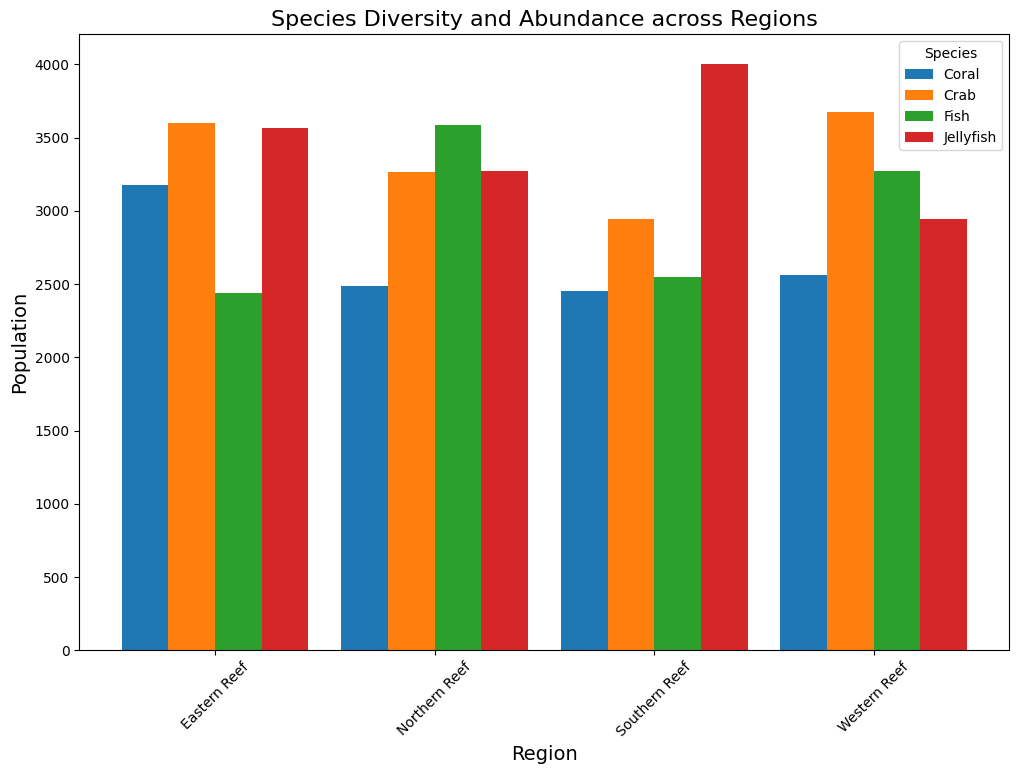

In [10]:
species_distribution = dataset.groupby(['Region', 'Species'])['Population'].sum().reset_index()

# Create a pivot table for easy plotting
pivot_table = species_distribution.pivot(index='Region', columns='Species', values='Population').fillna(0)

# Get unique regions and species from the dataset
regions = pivot_table.index.tolist()
species = pivot_table.columns.tolist()

# Number of regions
n_regions = len(regions)

# Position of the bars on the x-axis
bar_width = 0.85 / len(species)  # Adjust the width of the bars
indices = np.arange(n_regions)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
for i, spec in enumerate(species):
    ax.bar(indices + i * bar_width, pivot_table[spec], width=bar_width, label=spec)

ax.set_xlabel('Region', fontsize=14)
ax.set_ylabel('Population', fontsize=14)
ax.set_title('Species Diversity and Abundance across Regions', fontsize=16)
ax.set_xticks(indices + bar_width * (len(species) - 1) / 2)
ax.set_xticklabels(regions, rotation=45)
ax.legend(title='Species')

plt.show()

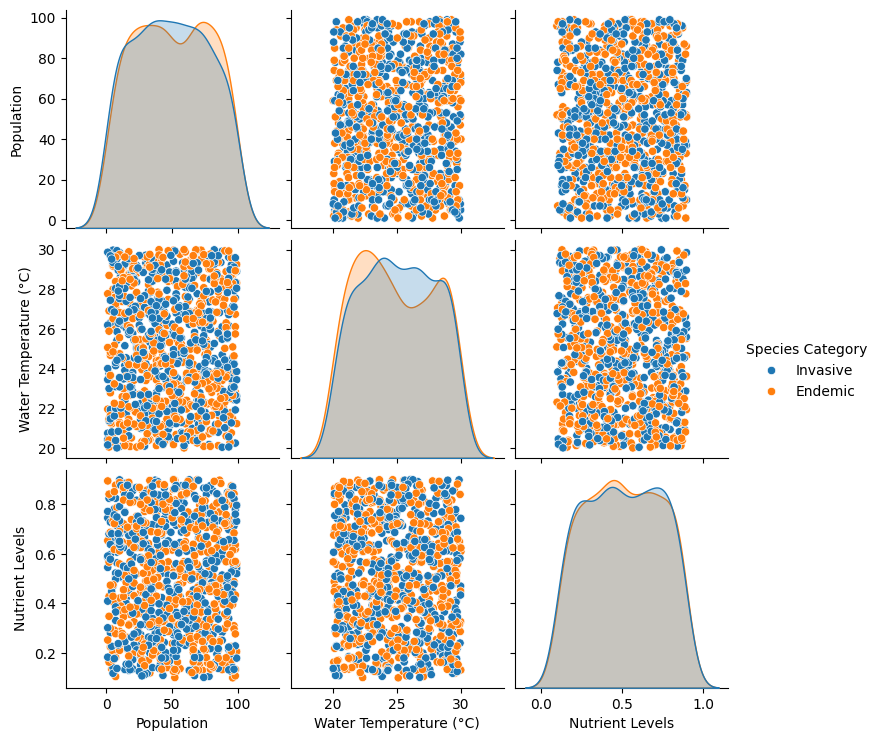

In [11]:
sns.pairplot(dataset, hue='Species Category', vars=['Population', 'Water Temperature (°C)', 'Nutrient Levels'])
# plt.title('Pair Plot to Distinguish Endemic vs. Invasive Species')

#matplotlib pairplot


plt.show()

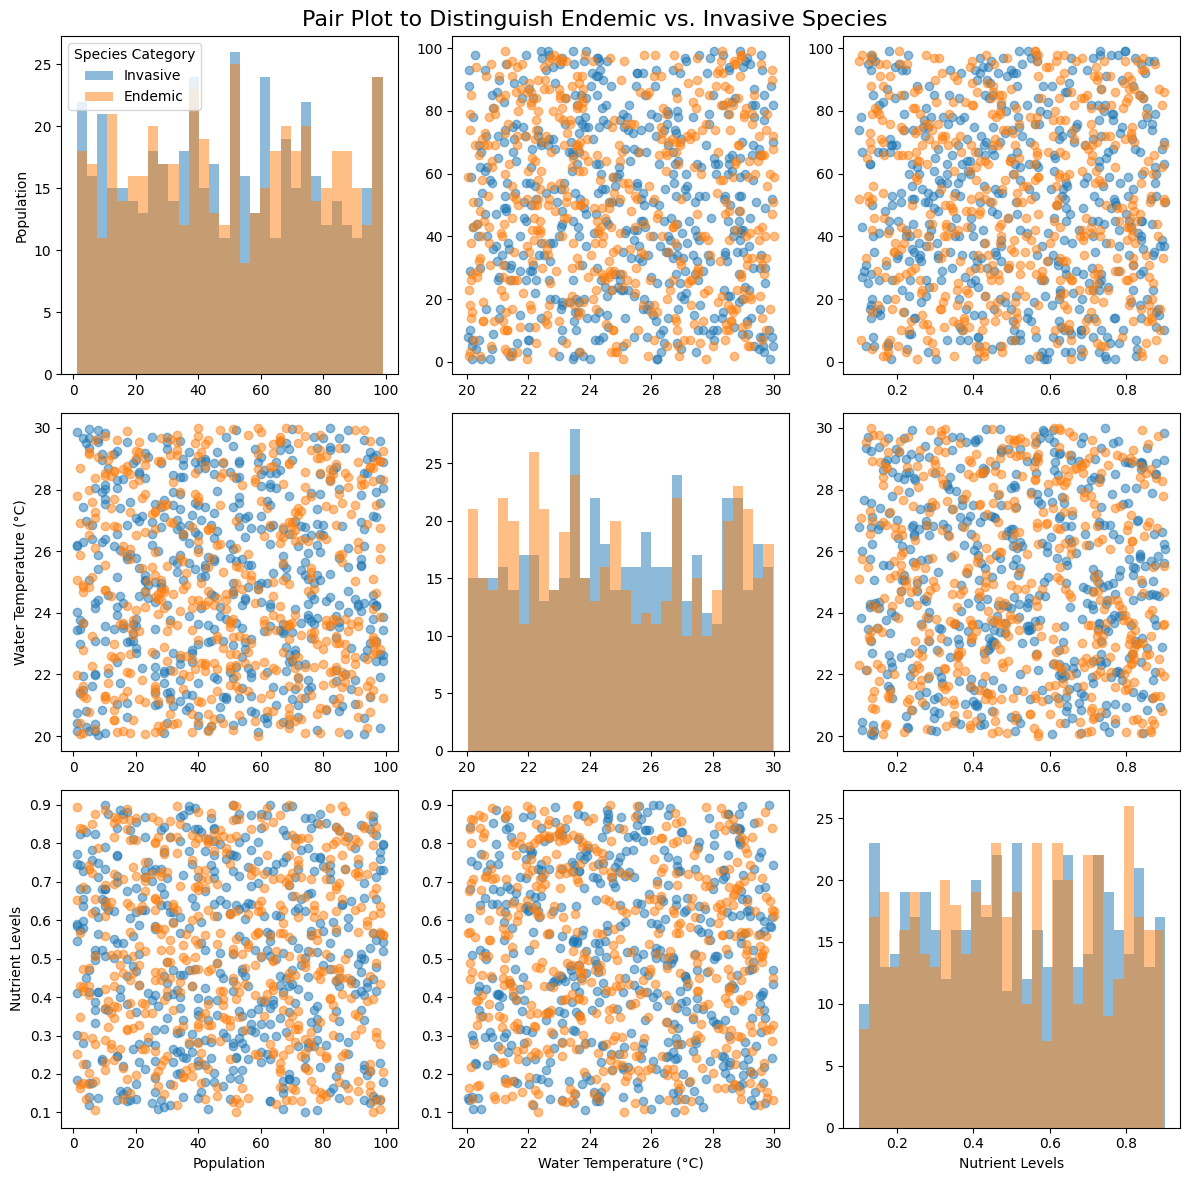

In [12]:
# Assume 'dataset' is your DataFrame
variables = ['Population', 'Water Temperature (°C)', 'Nutrient Levels']
categories = dataset['Species Category'].unique()

# Set colors for each species category - you might adjust these colors as needed
colors = {category: plt.cm.tab10(i) for i, category in enumerate(categories)}

# Create the pairplot grid
fig, axes = plt.subplots(nrows=len(variables), ncols=len(variables), figsize=(12, 12))

for i, var_i in enumerate(variables):
    for j, var_j in enumerate(variables):
        ax = axes[i, j]
        if i == j:  # Diagonal: Plot a histogram or a density plot
            for category in categories:
                subset = dataset[dataset['Species Category'] == category][var_i]
                ax.hist(subset, bins=30, alpha=0.5, color=colors[category], label=str(category))
            if i == 0:
                ax.legend(title='Species Category')
        else:  # Off-diagonal: Plot scatter plots
            for category in categories:
                subset = dataset[dataset['Species Category'] == category]
                ax.scatter(subset[var_j], subset[var_i], alpha=0.5, color=colors[category], label=str(category))
        ax.set_xlabel(var_j if i == len(variables) - 1 else "")
        ax.set_ylabel(var_i if j == 0 else "")
        # ax.set_xticks([])
        # ax.set_yticks([])
        if i == len(variables) - 1:  # Only set x-labels on the last row
            ax.set_xlabel(var_j)
        if j == 0:  # Only set y-labels on the first column
            ax.set_ylabel(var_i)

fig.suptitle('Pair Plot to Distinguish Endemic vs. Invasive Species', fontsize=16)
plt.tight_layout()
plt.show()

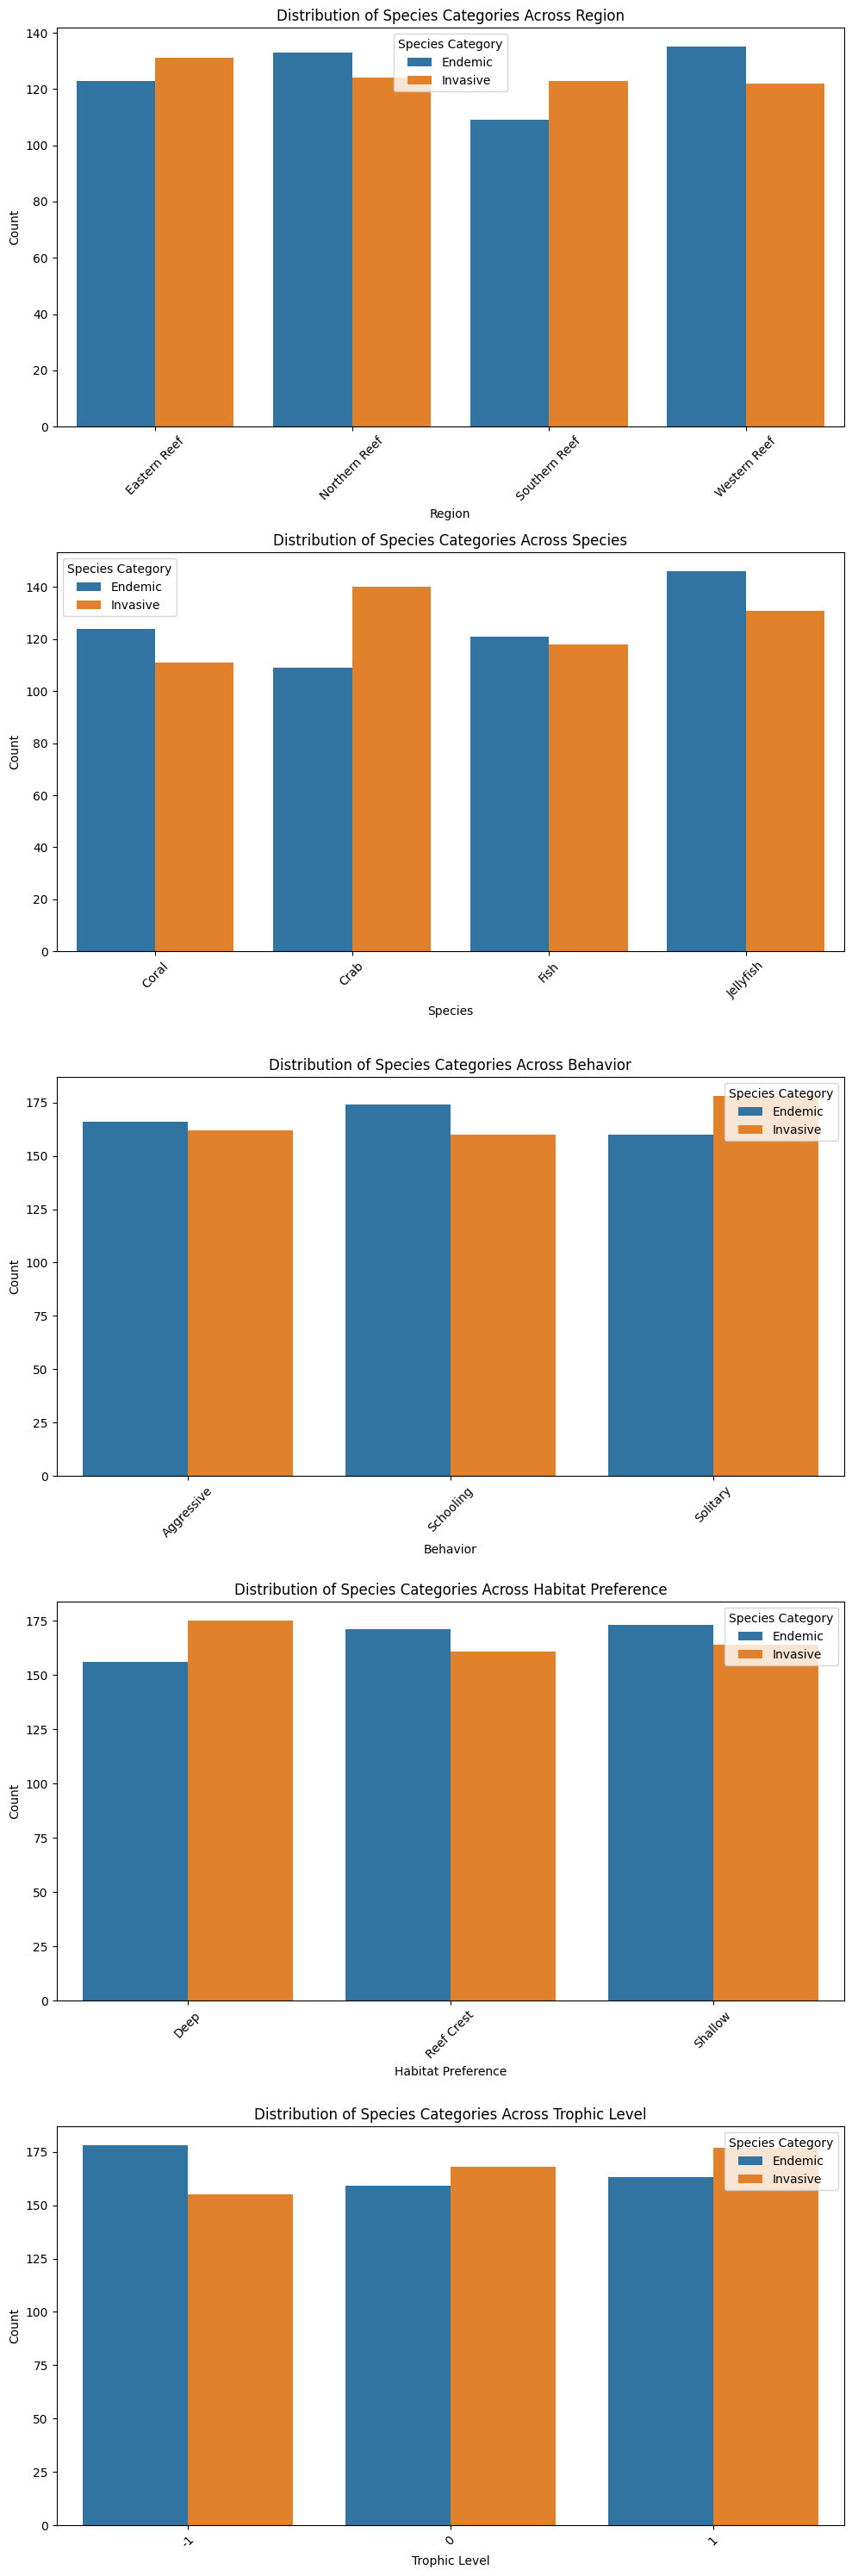

In [37]:
variables = ['Region', 'Species', 'Behavior', 'Habitat Preference', 'Trophic Level']

# Create a figure to hold the subplots
n_vars = len(variables)
fig, axes = plt.subplots(n_vars, 1, figsize=(10, 6 * n_vars))

# Loop through the variables and create a count plot for each
for i, var in enumerate(variables):
    ax = axes[i]  # Get the subplot axis
    sns.countplot(data=dataset, x=var, hue='Species Category', ax=ax)
    ax.set_title(f'Distribution of Species Categories Across {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.legend(title='Species Category')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# variables = ['Region', 'Species', 'Behavior', 'Habitat Preference', 'Trophic Level']

# # Create a figure to hold the subplots
# n_vars = len(variables)
# fig, axes = plt.subplots(n_vars, 1, figsize=(10, 6 * n_vars))

# # Loop through the variables and create a bar plot for each
# for i, var in enumerate(variables):
#     ax = axes[i]  # Get the subplot axis
#     # Prepare the data: calculate the count of categories for each variable
#     data_to_plot = dataset.groupby([var, 'Species Category']).size().reset_index(name='Count')
#     sns.barplot(data=data_to_plot, x=var, y='Count', hue='Species Category', ax=ax)
#     ax.set_title(f'Distribution of Species Categories Across {var}')
#     ax.set_xlabel(var)
#     ax.set_ylabel('Count')
#     ax.legend(title='Species Category')
#     ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# plt.tight_layout()
# plt.show()



In [14]:
# Preprocessing

# Changing the categorical data into numerical, Trophic level

trophic_level_map = {
    'Herbivore': -1,
    'Omnivore': 0,
    'Carnivore': 1
}

dataset['Trophic Level'] = dataset['Trophic Level'].map(trophic_level_map)
dataset['Trophic Level'].value_counts()

Trophic Level
 1    340
-1    333
 0    327
Name: count, dtype: int64

In [15]:
#scatter plot

In [16]:
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(dataset[['Region', 'Species', 'Behavior', 'Habitat Preference']])

# Convert the sparse matrix to a numpy array if it's not already
encoded_data = encoded_data.toarray()

# Generate column names for the encoded features
columns = encoder.get_feature_names_out(['Region', 'Species', 'Behavior', 'Habitat Preference'])

# Create a DataFrame from the encoded data
encoded_data_df = pd.DataFrame(encoded_data, columns=columns)

# Concatenate the original dataset with the new encoded data
dataset = pd.concat([dataset, encoded_data_df], axis=1)


In [17]:
dataset.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels,Region_Eastern Reef,...,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow
0,Western Reef,Fish,33,Invasive,Solitary,Shallow,-1,25.334903,0.306537,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Southern Reef,Crab,15,Invasive,Solitary,Deep,1,21.734394,0.421331,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,Eastern Reef,Jellyfish,8,Invasive,Schooling,Deep,1,25.429249,0.713816,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Eastern Reef,Crab,78,Invasive,Schooling,Deep,1,27.366580,0.343183,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Western Reef,Fish,61,Endemic,Schooling,Deep,-1,23.642494,0.349990,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


KeyError: ('Population', 'Water Temperature (°C)', 'Nutrient Levels')

In [19]:
# Normalizing numerical data (Population, Water Temperature, Nutrient Levels) min max scaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

# Create the MinMaxScaler object

scaler = MinMaxScaler()

scaler2 = FunctionTransformer(np.log1p, validate=True)

# Fit and transform the data

dataset[['Population', 'Water Temperature (°C)', 'Nutrient Levels']] = scaler.fit_transform( dataset[['Population', 'Water Temperature (°C)', 'Nutrient Levels']])
dataset[['Population', 'Water Temperature (°C)', 'Nutrient Levels']].describe()



,Population,Water Temperature (°C),Nutrient Levels
count,1000.000000,1000.000000,1000.000000
mean,0.498051,0.497521,0.509152
std,0.289761,0.291292,0.283974
min,0.000000,0.000000,0.000000
25%,0.255102,0.247133,0.267325
50%,0.500000,0.477979,0.506562
75%,0.744898,0.750698,0.760060
max,1.000000,1.000000,1.000000


In [20]:
dataset.head()

,Region,Species,Population,Species Category,Behavior,Habitat Preference,Trophic Level,Water Temperature (°C),Nutrient Levels,Region_Eastern Reef,...,Species_Coral,Species_Crab,Species_Fish,Species_Jellyfish,Behavior_Aggressive,Behavior_Schooling,Behavior_Solitary,Habitat Preference_Deep,Habitat Preference_Reef Crest,Habitat Preference_Shallow
0,Western Reef,Fish,0.326531,Invasive,Solitary,Shallow,-1,0.533072,0.258070,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Southern Reef,Crab,0.142857,Invasive,Solitary,Deep,1,0.172124,0.401608,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,Eastern Reef,Jellyfish,0.071429,Invasive,Schooling,Deep,1,0.542530,0.767329,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,Eastern Reef,Crab,0.785714,Invasive,Schooling,Deep,1,0.736745,0.303893,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,Western Reef,Fish,0.612245,Endemic,Schooling,Deep,-1,0.363409,0.312404,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         1000 non-null   object 
 1   Species                        1000 non-null   object 
 2   Population                     1000 non-null   float64
 3   Species Category               1000 non-null   object 
 4   Behavior                       1000 non-null   object 
 5   Habitat Preference             1000 non-null   object 
 6   Trophic Level                  1000 non-null   int64  
 7   Water Temperature (°C)         1000 non-null   float64
 8   Nutrient Levels                1000 non-null   float64
 9   Region_Eastern Reef            1000 non-null   float64
 10  Region_Northern Reef           1000 non-null   float64
 11  Region_Southern Reef           1000 non-null   float64
 12  Region_Western Reef            1000 non-null   fl

In [36]:
# Logistic Regression

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (goal is to identify the species category)

X = dataset.drop(['Species Category', 'Region', 'Species', 'Behavior', 'Habitat Preference'], axis=1)

y = dataset['Species Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

# Create the Logistic Regression model

model = LogisticRegression(max_iter=1000)

# Fit the model to the training data

model.fit(X_train, y_train)

# Predict the species category for the test data

y_pred = model.predict(X_test)

# Evaluate the model

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test, y_pred))



param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],  # More solvers support 'l2'
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 500, 1000],
    'tol': [0.0001, 0.001]
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5,scoring='accuracy')
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

print(classification_report(y_test, grid.best_estimator_.predict(X_test)))
print(accuracy_score(y_test, grid.best_estimator_.predict(X_test)))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     Endemic       0.49      0.53      0.51       146
    Invasive       0.51      0.47      0.49       154

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\norbe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_sag.py:350: Conve

{'C': 1, 'class_weight': None, 'max_iter': 500, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.001}
LogisticRegression(C=1, max_iter=500, solver='sag', tol=0.001)
0.54
              precision    recall  f1-score   support

     Endemic       0.49      0.53      0.51       146
    Invasive       0.51      0.47      0.49       154

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

0.5
0.5


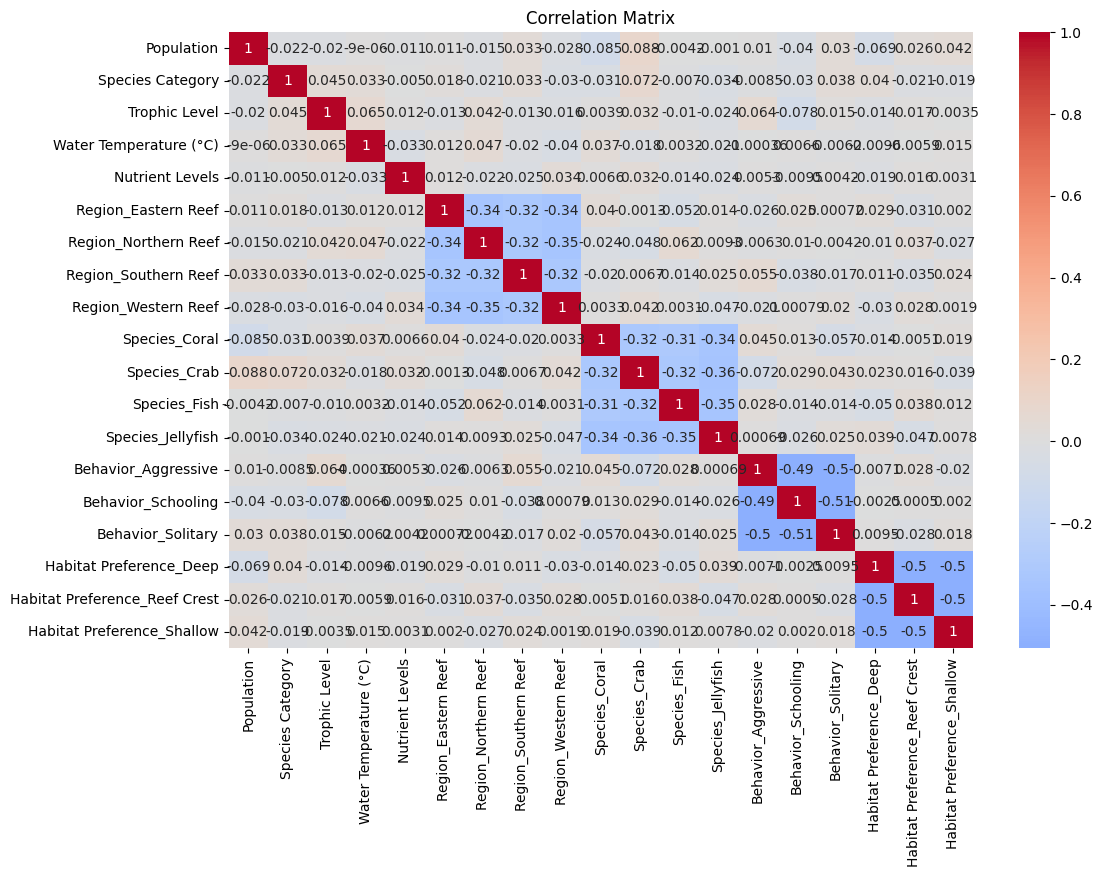

In [23]:
#Correlation Matrix

# Calculate the correlation matrix

corrdataset = dataset.drop(['Region', 'Species', 'Behavior', 'Habitat Preference'], axis=1)
category_map = {
    'Endemic': 0,
    'Invasive': 1
}
corrdataset['Species Category'] = corrdataset['Species Category'].map(category_map)

correlation_matrix = corrdataset.corr()

# Plot the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

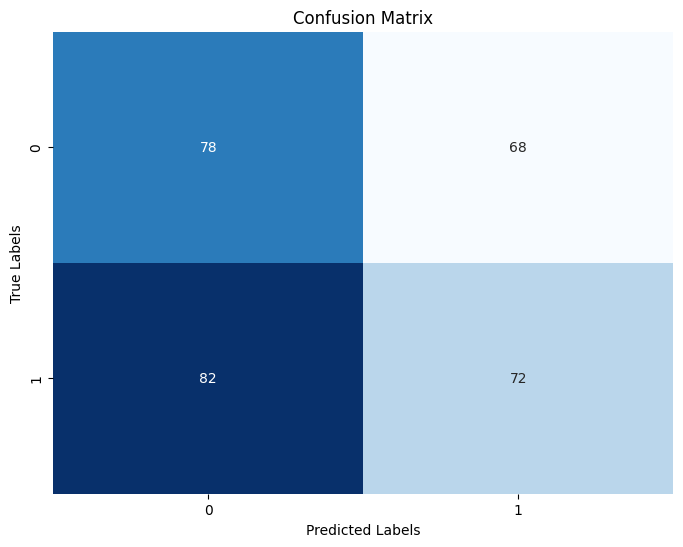

In [38]:
#confusion matrix

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix')

plt.xlabel('Predicted Labels')

plt.ylabel('True Labels')

plt.show()